# Convergence tests - dynamics and moments

In this file we show how to test for convergence of the system dynamics and the work moments. 

In both cases, we must test for convergence w.r.t. the timestep dt and the SVD precision p.

For the moments, it is also necessary to check for convergence w.r.t. 
(i) 's' the equilibration time
(ii) The finite difference order

In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def load_dynamics(a, tp, sta, dt, p):
    filename  = f'dynamics-files/dyns-a{a}_G10.0_w25.0_e25.0_tp{tp}_sta{sta}_dt{dt}_p{p}.csv'
    try:
        df = pd.read_csv(filename)
        return df
    except:
        return None

### CONVERGENCE PLOTS FOR DYNAMICS

def plot_dynamics_convergence(alpha, tp, dt_list, p_list, sta_list=[0,1]):
    # dictionary to store dataframes with (dt,p) as key
    dfs = {}

    colors = ['blue', 'red']
    linestyles = ['-', '--', '-.', ':']

    for dt in dt_list:
        for p in p_list:
            for sta in sta_list:
                dfs[(dt, p, sta)] = pd.read_csv(f'dynamics-files/dyns-a{alpha}_G10.0_w25.0_e25.0_tp{tp}_sta{sta}_dt{dt}_p{p}.csv')
         
    # Create figure with three subplots
    fig, ax = plt.subplots(2, 2, figsize=(10, 6))

    # choose integers for slicing (n=0, m=-1 for the whole range)
    n = 0
    m = -1
    
    # NO STA
    # Plot coherence
    for i, dt in enumerate(dt_list):
        for j, p in enumerate(p_list):
            for sta in sta_list:
                ax[0,sta].plot(dfs[(dt,p, sta)]['tlist'][n:m], dfs[(dt,p, sta)]['coh'][n:m],
                        label=f'dt={dt}, p={p}',
                        color=colors[i],
                        linestyle=linestyles[j])

    ax[0,0].set_ylabel('Coherence')
    ax[0,0].legend(ncol=2, fontsize=6)    
    ax[0,1].set_ylabel('Coherence')
    ax[0,1].legend(ncol=2, fontsize=6)

    # Plot overlap_target
    for i, dt in enumerate(dt_list):
        for j, p in enumerate(p_list):
            for sta in sta_list:
                ax[1, sta].plot(dfs[(dt,p, sta)]['tlist'][n:m], dfs[(dt,p, sta)]['overlap_target'][n:m],
                        label=f'dt={dt}, p={p}',
                        color=colors[i],
                        linestyle=linestyles[j])
    ax[1,0].set_xlabel('Time')
    ax[1,0].set_ylabel('Overlap Target')
    ax[1,0].legend(ncol=2, fontsize=6)
    
    ax[1,1].set_xlabel('Time')
    ax[1,1].set_ylabel('Overlap Target')
    ax[1,1].legend(ncol=2, fontsize=6)


    ax[0,0].set_ylim(-0.1, 1.1)
    ax[1,0].set_ylim(-0.1, 1.1)
    ax[0,1].set_ylim(-0.1, 1.1)
    ax[1,1].set_ylim(-0.1, 1.1)

    ax[0,0].set_title('No STA')
    ax[0,1].set_title('With STA')
    
    ax[1,0].axhline(1, color='black', linestyle='--', linewidth=0.5)
    ax[1,1].axhline(1, color='black', linestyle='--', linewidth=0.5)
    plt.suptitle(f'Convergence tests for dynamics: alpha={alpha}, tp={tp}', fontsize=16)
    plt.tight_layout()
    plt.show()
    return

# Convergence of system dynamics

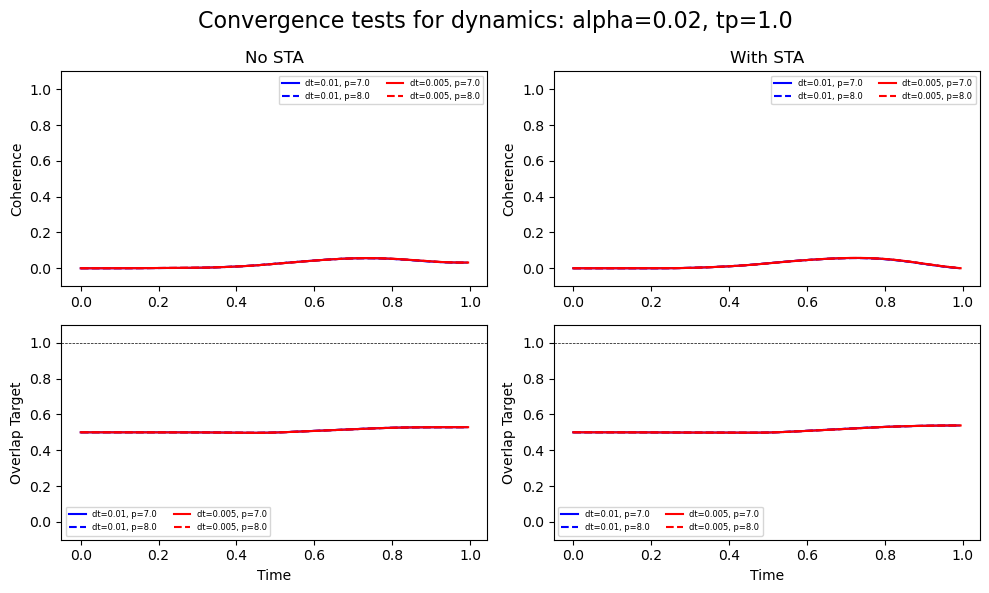

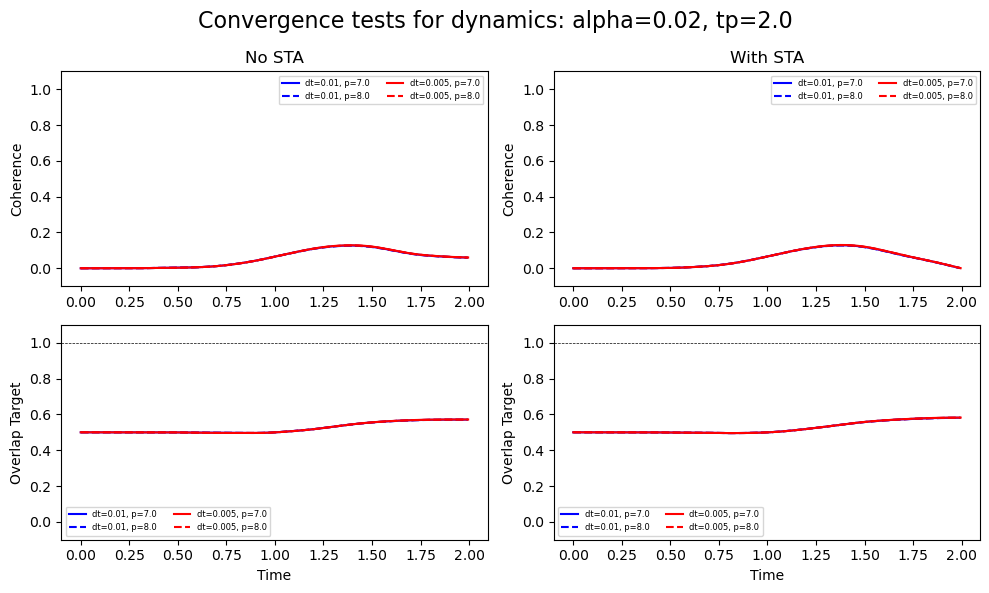

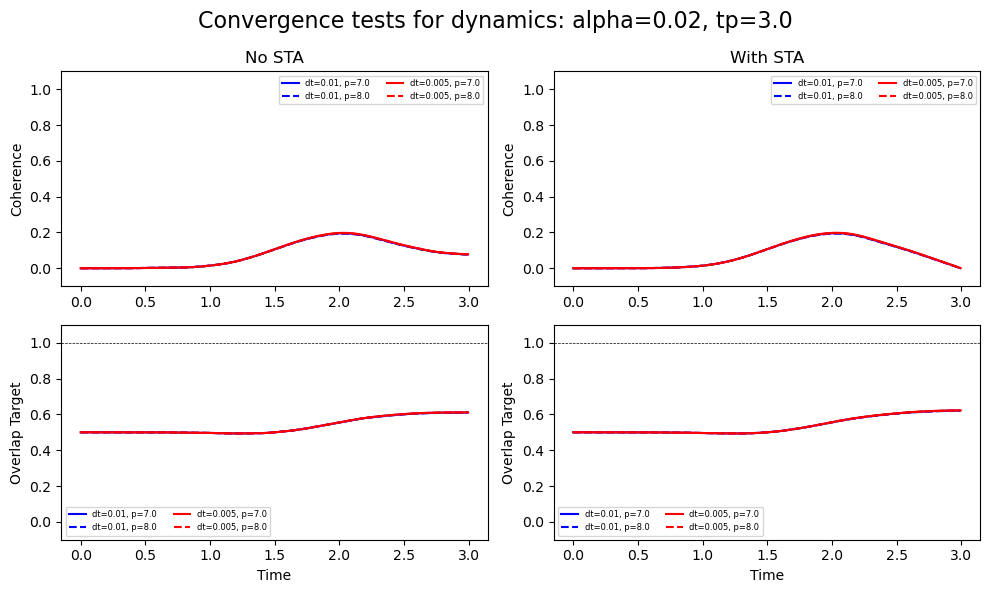

In [4]:
alpha=0.02
tp_list = [1.0, 2.0, 3.0]
dt_list = [0.01, 0.005]
p_list = [7.0, 8.0]
for tp in tp_list:
    plot_dynamics_convergence(alpha, tp, dt_list, p_list)


# Convergence of moments

In [5]:
def load_moments(a, tp, sta, dt, p, s):
    filename  = f'moments-files/moms-a{a}_G10.0_w25.0_e25.0_tp{tp}_sta{sta}_dt{dt}_p{p}_eq{s}.csv'
    df = pd.read_csv(filename)
    return df

### CONVERGENCE PLOTS FOR MOMENTS

def plot_convergence_moments(alpha, tp, dt_list, p_list, s, sta_list=[0,1]):
    # dictionary to store dataframes with (dt,p) as key
    dfs = {}

    colors = ['blue', 'red']
    linestyles = ['-', '--', '-.', ':']

    for dt in dt_list:
        for p in p_list:
            for sta in sta_list:
                dfs[(dt, p, sta)] = load_moments(alpha, tp, sta, dt, p, s)
            
    # Create figure with three subplots
    # fig, ax = plt.subplots(2, 2, figsize=(10, 6))

    # choose integers for slicing (n=0, m=-1 for the whole range)
    n = 0
    m = -1

    # Get the length of moments data...
    n = len(dfs[(dt, p, sta)]['mean_real'][1::2])
    # ...and create a list of even integers: 2, 4, ..., 2n
    orders = [2 * i for i in range(1, n + 1)]

    # Create figure with three subplots
    fig, ax = plt.subplots(3, 2, figsize=(15, 12))

    # Mean
    for i, dt in enumerate(dt_list):
        for j, p in enumerate(p_list):
            for sta in sta_list:
                ax[0, sta].plot(orders, dfs[(dt,p, sta)]['mean_real'][1::2],
                        '*',
                        label=f'dt={dt}, p={p}',
                        color=colors[i],
                        linestyle=linestyles[j])
    ax[0,0].set_ylabel('Mean')
    ax[0,1].set_ylabel('Mean')          
        # variance
    for i, dt in enumerate(dt_list):
        for j, p in enumerate(p_list):
            for sta in sta_list:
                ax[1, sta].plot(orders, dfs[(dt,p, sta)]['variance_real'][1::2],
                        '*',
                        label=f'dt={dt}, p={p}',
                        color=colors[i],
                        linestyle=linestyles[j])
    ax[1,0].set_ylabel('Variance')
    ax[1,1].set_ylabel('Variance')            
        # Mean
    for i, dt in enumerate(dt_list):
        for j, p in enumerate(p_list):
            for sta in sta_list:
                ax[2, sta].plot(orders, dfs[(dt,p, sta)]['skewness_real'][1::2],
                        '*',
                        label=f'dt={dt}, p={p}',
                        color=colors[i],
                        linestyle=linestyles[j])
    ax[2,0].set_ylabel('Skewness')
    ax[2,1].set_ylabel('Skewness')            
    for axes in ax.flat:
        axes.set_xlabel('Finite Difference Order')        
        axes.legend(ncol=len(dt_list), fontsize=12)

    plt.suptitle(f'Convergence tests for moments: alpha={alpha}, tp={tp}', fontsize=16)
    plt.tight_layout()
    plt.show()
    return

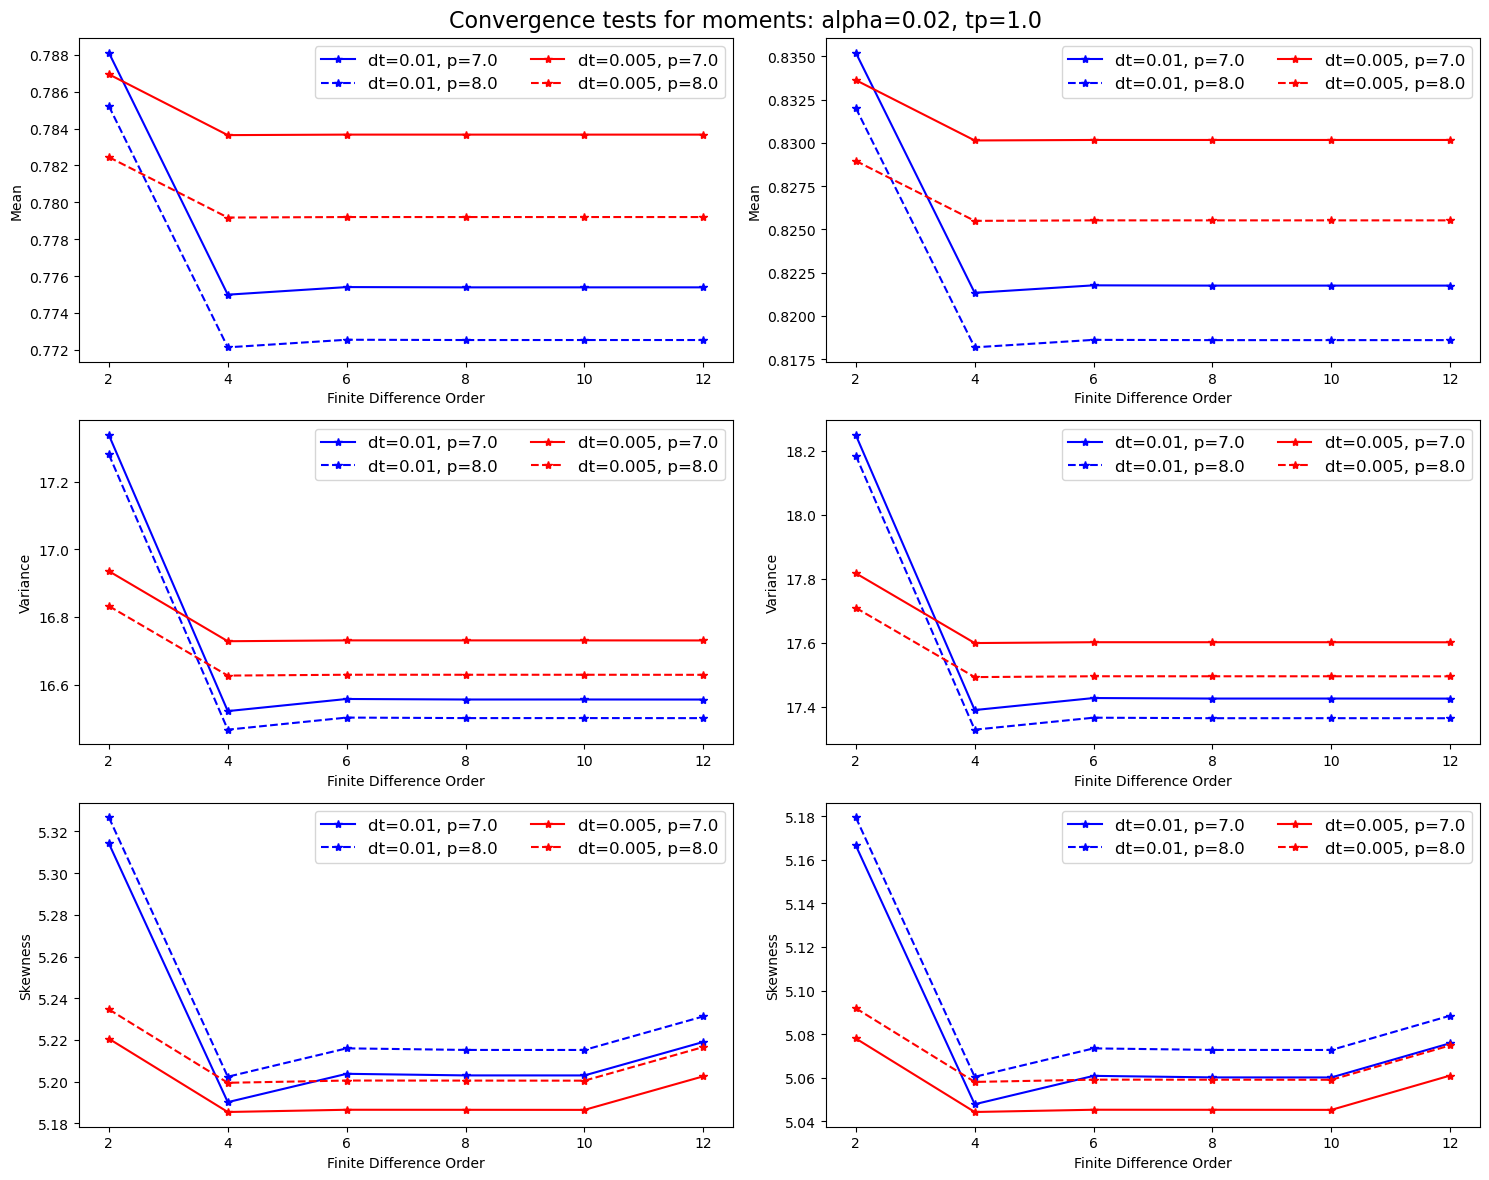

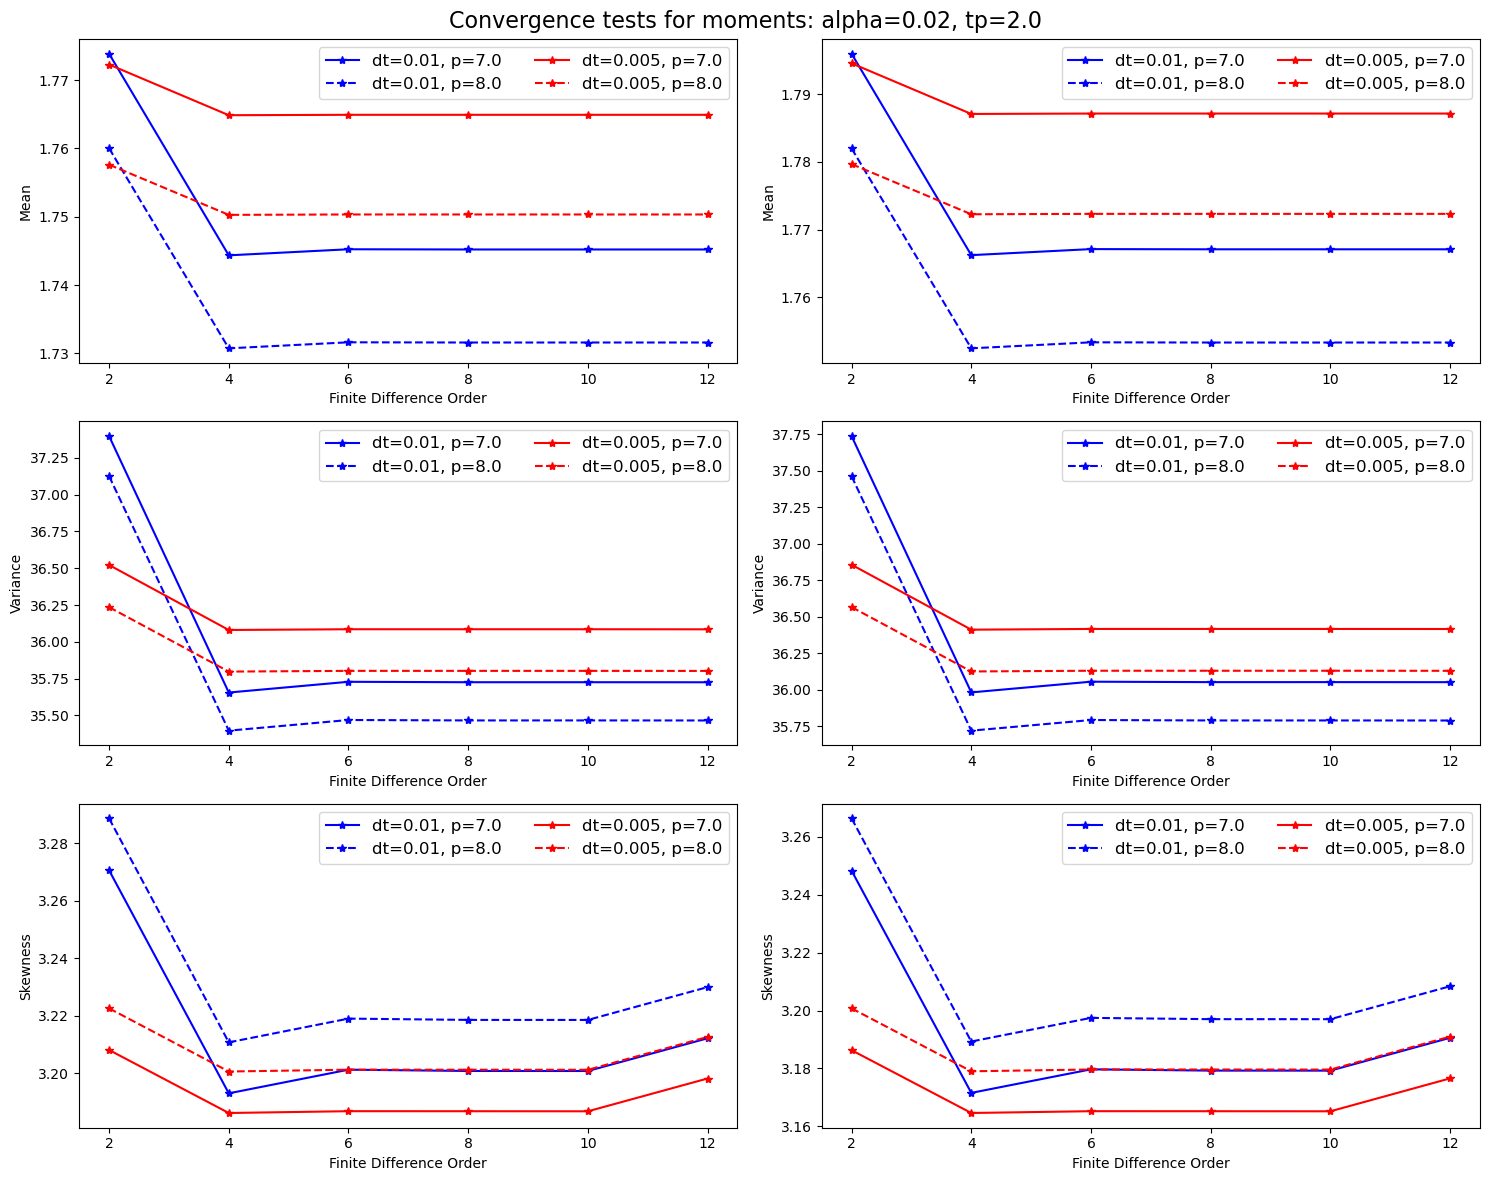

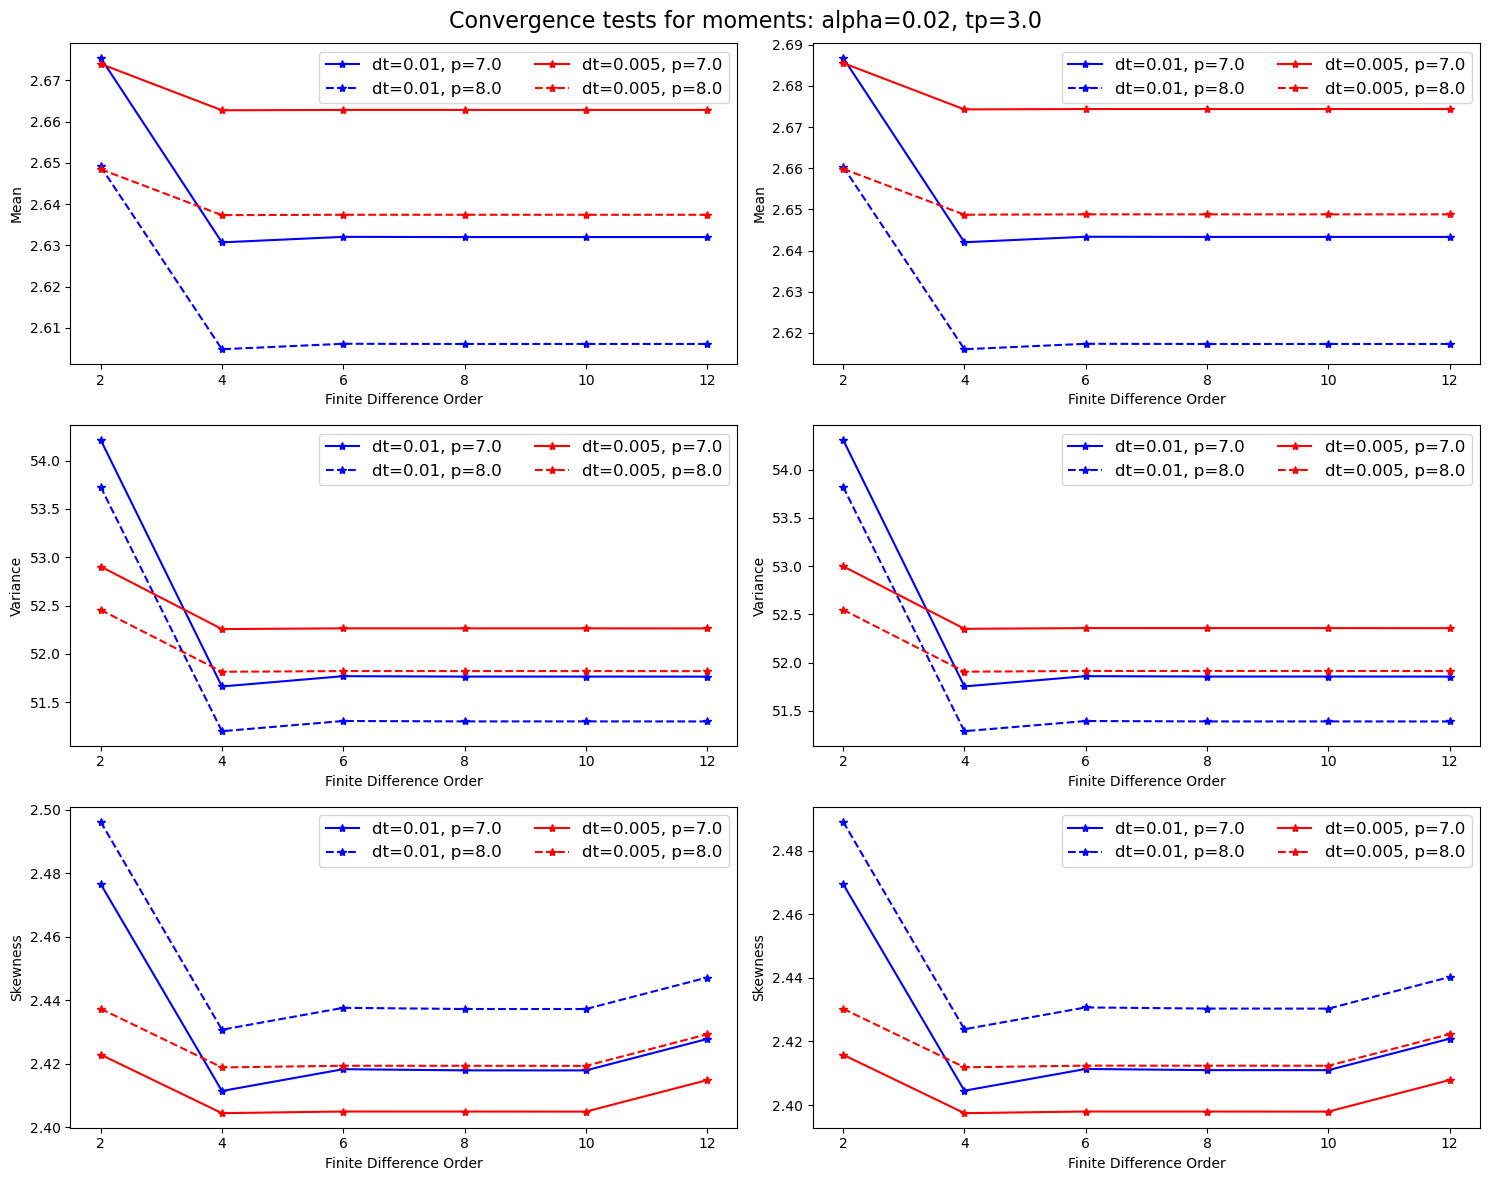

In [6]:
dt_list = [0.01, 0.005]
p_list = [7.0, 8.0]

s=1

### convergence of dynamics
for tp in tp_list:
    plot_convergence_moments(alpha, tp, dt_list, p_list, s)

# Convergence of WCF

In [10]:
def load_wcf(a, tp, sta, dt, p, s, X0, Xf):
    filename  = f'wcf-files-combined/WCF_a{a}_G10.0_w25.0_e25.0_t{tp}_sta{sta}_dt{dt}_p{p}_eq{s}_X{X0}_Xf{Xf}.txt'
    wcf = pd.read_csv(filename, sep='\t', header=None)
    return wcf

### CONVERGENCE PLOTS FOR MOMENTS

def plot_convergence_wcf(alpha, tp, dt_list, p_list, s, X0, Xf, sta_list=[0,1]):
    # dictionary to store dataframes with (dt,p) as key
    wcfs = {}

    colors = ['blue', 'red']
    linestyles = ['-', '--', '-.', ':']

    for dt in dt_list:
        for p in p_list:
            for sta in sta_list:
                wcfs[(dt, p, sta)] = load_wcf(alpha, tp, sta, dt, p, s, X0, Xf)
            
    # Create figure with three subplots
    # fig, ax = plt.subplots(2, 2, figsize=(10, 6))

    # choose integers for slicing (n=0, m=-1 for the whole range)
    n = 0
    m = -1
    sta_markers = ['o', 's']
    chis = {}
    for dt in dt_list:
        chis[dt] = np.arange(0, len(wcfs[(dt, p, sta)][0]))*dt

    # Create figure with three subplots
    fig, ax = plt.subplots(2, 2, figsize=(15, 8))

    # Mean
    for i, dt in enumerate(dt_list):
        for j, p in enumerate(p_list):
            for sta in sta_list:
                ax[0, sta].plot(chis[dt], wcfs[(dt,p, sta)][0],
                        marker=sta_markers[sta],
                        label=f'dt={dt}, p={p}, sta={sta}',
                        color=colors[i],
                        linestyle=linestyles[j])
    ax[0,0].set_ylabel('Real')
    ax[0,1].set_ylabel('Real')
        # variance
    for i, dt in enumerate(dt_list):
        for j, p in enumerate(p_list):
            for sta in sta_list:
                ax[1, sta].plot(chis[dt], wcfs[(dt,p, sta)][1],
                        marker=sta_markers[sta],
                        label=f'dt={dt}, p={p}, sta={sta}',
                        color=colors[i],
                        linestyle=linestyles[j])
    ax[1,0].set_ylabel('Imag')
    ax[1,1].set_ylabel('Imag')
         
    for axes in ax.flat:
        axes.set_xlabel('Counting parameter')        
        axes.legend(ncol=len(dt_list), fontsize=12)

    plt.suptitle(f'Convergence tests for WCF: alpha={alpha}, tp={tp}', fontsize=16)
    plt.tight_layout()
    plt.show()
    return

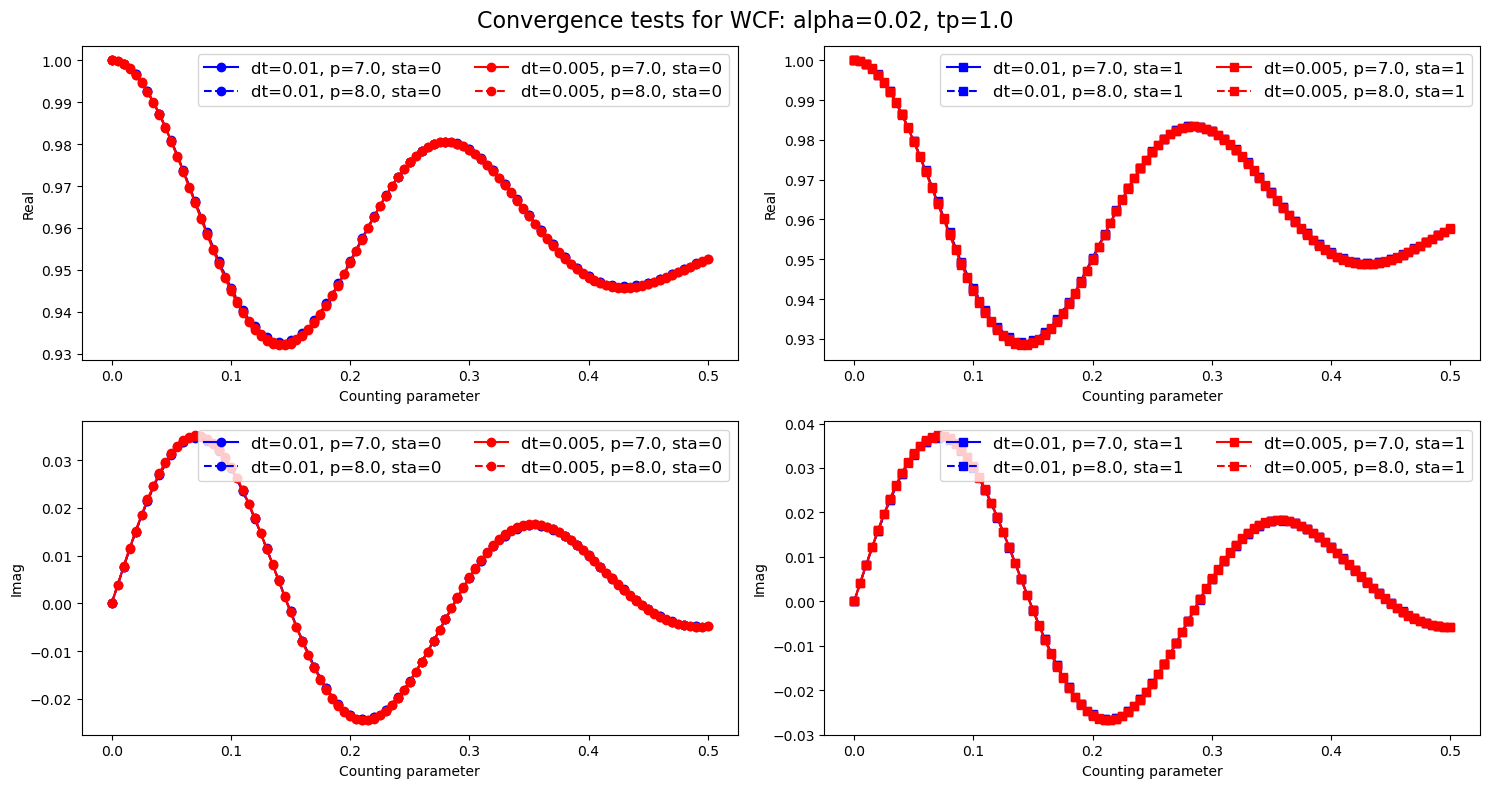

In [12]:
plot_convergence_wcf(alpha, 1.0, dt_list, p_list, s, 0.0, 0.5, sta_list=[0,1])